The aim of this challenge is to “classify drugs based on their biological activity”. Pharmaceutical drug discovery aims to identify certain proteins that are associated with a specific disease, and then to develop molecules that can target those proteins. The MoA of a molecule encodes its biological activity. Our dataset describes the response of 100 different types of human cells to various drugs. Those response patterns will be used to classify the MoA reponse. Note, that drugs can have multiple MoA annotations.

This is a multi-label classification problem. The evaluation metric is the mean columnwise log loss.


# Understanding the Target Features

I will focus on train_targets_scored file to understand what kind of target features are we dealing with in this problem.

#### Let's begin

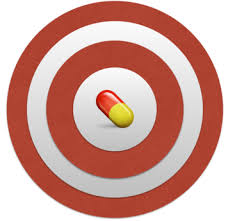

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train_targets_scored = pd.read_csv('/kaggle/input/lish-moa/train_targets_scored.csv')

As we can see there are 876 columns in the dataset. Out of which one column is sig_id which will be used to combine the target columns with the independent features.

#### Let's explore each target variable separately now to get a better understanding.

In [ ]:
target_value_1 = []
label_name = []

for i in train_targets_scored.drop('sig_id',axis=1).columns:
    target_value_1.append(train_targets_scored[i].value_counts()[1])
    label_name.append(i)    

In [ ]:
class_distribution = pd.DataFrame({'label_name':label_name,'target_value_1':target_value_1})

In [ ]:
class_distribution.sort_values(by=['target_value_1'],ascending=False,inplace=True)
class_distribution.reset_index(drop=True)

This dataframe gives us the number 1s for reach target variable in descending order.

We can see that the most common MoA is 'nfkb_inhibitor'. With the least common being 'erbb2_inhibitor and 'atp-sensitive_potassium_channel_antagonist'.

I hope you got some better understanding of the Target Features which might be helpful for Model Building!